In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import folium

In [2]:
data = pd.read_csv('data/US_Accidents_June20.csv')
data = data[data['State']=='CA']
time = pd.to_datetime(data.Start_Time)

<Figure size 432x288 with 0 Axes>

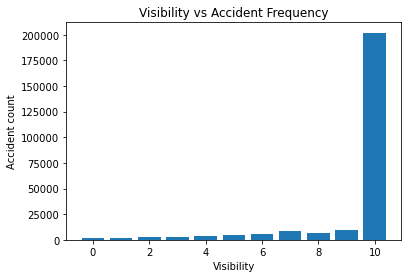

<Figure size 432x288 with 0 Axes>

In [3]:
value_vis = data['Visibility(mi)']
plt.hist(value_vis, bins=[0,1,2,3,4,5,6,7,8,9,10,11] , rwidth=0.8, align = 'left')
plt.title('Visibility vs Accident Frequency')
plt.xlabel('Visibility')
plt.ylabel('Accident count')
plt.figure()
#this seems somewhat useless unless we know the probabilities of each visibility

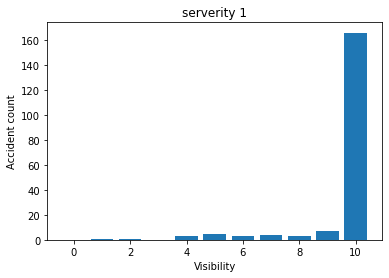

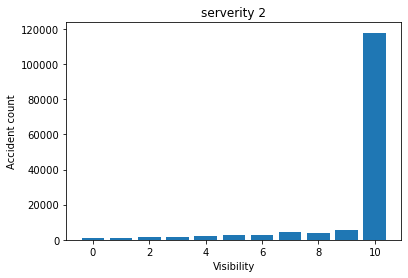

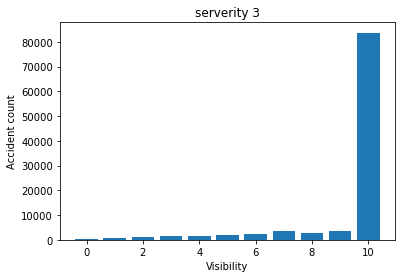

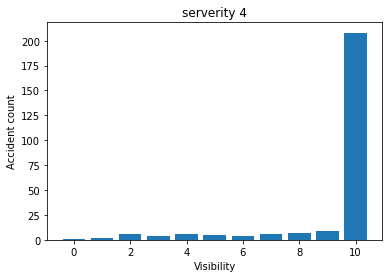

<Figure size 432x288 with 0 Axes>

In [4]:

for s in range(1,5):
    value_vis = data.loc[data["Severity"] == s]['Visibility(mi)'].values
    #print(np.histogram(value_vis,bins=[0,1,2,3,4,5,6,7,8,9,10]))
    plt.hist(value_vis,bins=[0,1,2,3,4,5,6,7,8,9,10,11],rwidth=0.8,align = 'left')
    plt.title('serverity ' + str(s) )
    plt.xlabel('Visibility')
    plt.ylabel('Accident count')
    plt.figure()
    #this seems somewhat useless unless we know the probabilities of each visibility

[2.28816677 2.3917004  2.40776081 2.43758085 2.43657019 2.43198042
 2.43394777 2.45464481 2.41871711 2.40238956 2.41574147]
[0.00797715 0.00825175 0.01281013 0.01196573 0.01429984 0.01908476
 0.02022435 0.03081707 0.0280642  0.03739376 0.80911125]


AttributeError: 'function' object has no attribute 'set_ylim'

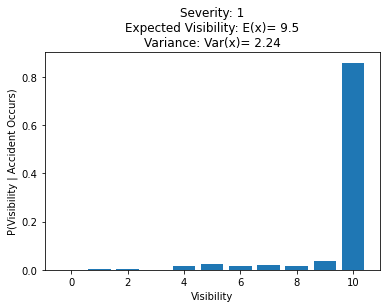

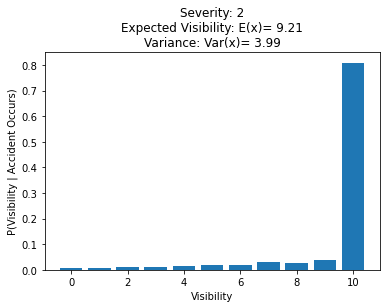

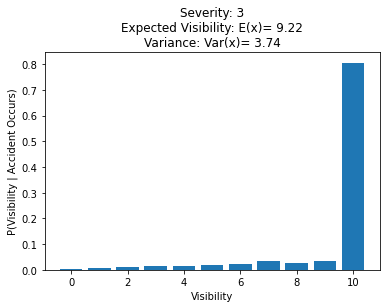

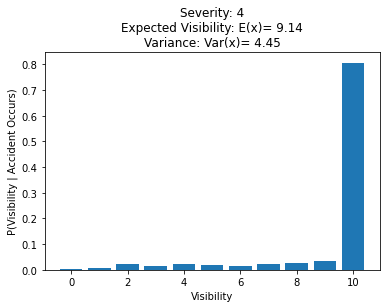

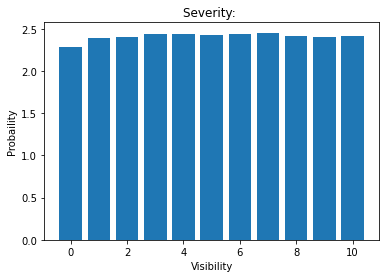

In [15]:
sevlist=[]
for s in range (1,5):
     value_vis2 = data.loc[data["Severity"] == s]['Visibility(mi)'].values
     sevlist.append(np.histogram(value_vis2,bins=[0,1,2,3,4,5,6,7,8,9,10,11]))

scaledsum=np.zeros(11) #count of accidents * severity level
acount=np.zeros(11) #count of accidents used for calucations
prob=[np.zeros(11),np.zeros(11),np.zeros(11),np.zeros(11)] 
ex=[np.zeros(11),np.zeros(11),np.zeros(11),np.zeros(11)]
ex_squared=[np.zeros(11),np.zeros(11),np.zeros(11),np.zeros(11)]
expected_v_squared=[np.zeros(11),np.zeros(11),np.zeros(11),np.zeros(11)]
expected_v=np.zeros(4)
variance=np.zeros(4)
for i in range(4):
    for j in range(11):
        scaledsum[j]=scaledsum[j]+sevlist[i][0][j]*(i+1)
        acount[j]+=sevlist[i][0][j]
        prob[i][j]=(sevlist[i][0][j])/np.sum(sevlist[i][0])
        ex[i][j]=prob[i][j]*sevlist[i][1][j]
        ex_squared[i][j]=(prob[i][j])*(sevlist[i][1][j]**2)
    expected_v[i]=np.sum(ex[i])
    expected_v_squared[i]=np.sum(ex_squared[i])
    variance[i]=expected_v_squared[i]-expected_v[i]**2
    plt.bar(list(range(0,11)),prob[i])
    plt.title('Severity: ' + str(i+1)+'\nExpected Visibility: E(x)= '+str(expected_v[i].round(2))+'\nVariance: Var(x)= '+str(variance[i].round(2)) )
    plt.xlabel('Visibility')
    plt.ylabel('P(Visibility | Accident Occurs)')
    plt.figure()

expected_severity=np.zeros(11)
for i in range(11):
     expected_severity[i]=scaledsum[i]/acount[i]
print(expected_severity)
print(prob[1])

plt.bar(list(range(0,11)),expected_severity)
plt.title('Expected Accident Severity Given Visibility')
plt.xlabel('Visibility')
plt.ylabel('Expected Accident Severity')
plt.axes.set_ylim([2,3])
plt.figure()




        

